In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

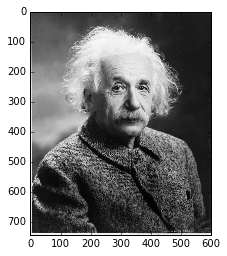

In [9]:
# Read in the image as greyscale
# Notice that in greyscale, black is 1 while while white is zero.
# So we need to do the transformation.
jpgfile = 1 - io.imread('./ALbertEinstein.jpg',as_grey=True)

# Show the image 
plt.imshow(jpgfile, cmap='Greys')
plt.show()

In [11]:
# Calculate the statistical properties of the image so that we can add proper noise
mean = np.mean(jpgfile)
std = np.std(jpgfile)
print("The mean value of the image is %f." %mean)
print("The standard deviation of the image is %f"%std)

The mean value of the image is 0.679365.
The standard deviation of the image is 0.251082


In [31]:
# Construct noisy images
noisy_data = np.zeros((50, jpgfile.shape[0], jpgfile.shape[1]))
for l in range(10):
    for m in range(5):
        noisy_data[l*5+m,:,:] = jpgfile[:,:] + np.random.normal(loc=0,scale=std*(l+4),
                                                                 size=jpgfile.shape)

In [32]:
# Construct the mirror image
mirror = np.fliplr(jpgfile)
# Construct the noise mirror images
noisy_data_mirror = np.zeros((50, jpgfile.shape[0], jpgfile.shape[1]))
for l in range(10):
    for m in range(5):
        noisy_data_mirror[l*5+m,:,:] = mirror[:,:] + np.random.normal(loc=0,scale=std*(l+4),
                                                                 size=jpgfile.shape)

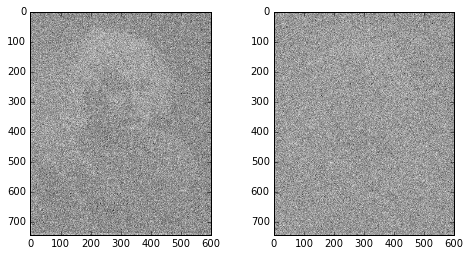

In [33]:
# Show noisy image
fig = plt.figure(figsize=(8,4))
fig.add_subplot('121')
plt.imshow(noisy_data[0,:,:], cmap="Greys")
fig.add_subplot('122')
plt.imshow(noisy_data[-1,:,:], cmap="Greys")
plt.show()


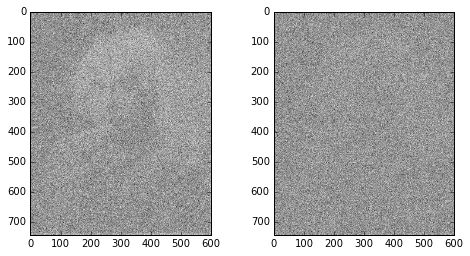

In [35]:
# Show noisy flipped image
fig = plt.figure(figsize=(8,4))
fig.add_subplot('121')
plt.imshow(noisy_data_mirror[0,:,:], cmap="Greys")
fig.add_subplot('122')
plt.imshow(noisy_data_mirror[-1,:,:], cmap="Greys")
plt.show()

In [48]:
# Calculate correlation matrix R
R = np.zeros((100,100))
# First normalize the data
data = np.zeros((100,noisy_data.shape[-2],noisy_data.shape[-1]))
data[:50,:,:] = noisy_data
data[50:,:,:] = noisy_data_mirror
data_mean = np.mean(data,axis=(1,2))
data_std  = np.std(data,axis=(1,2))
data = data - data_mean[:,np.newaxis,np.newaxis]
data = data / data_std[:,np.newaxis,np.newaxis]

for l in range(99):
    for m in range(l+1,100):
        R[l, m] = np.sum(np.multiply(data[l,:,:], data[m,:,:]))

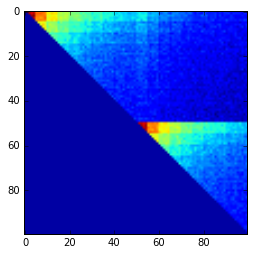

In [50]:
plt.imshow(R)
plt.show()

In [1]:
# Begin to calculate the embedding
import tensorflow as tf
import numpy as np

In [2]:
R = np.load('./correlation.npy')

In [39]:
# Build the graph
initial_value = np.random.normal(scale=1,size=(100,2))

X = tf.Variable(initial_value, trainable=True, dtype=tf.float64)
# Notice that I have only calculated the upper half correlation, so I have to symmetrize the 
# correlation before I apply it to the procedure.
Corralation = tf.constant(value= R + np.transpose(R),dtype=tf.float64)

# Notice that the diagonal part does not 
tmp1 = Corralation - tf.matmul(X,X,transpose_b=True)
tmp2 = tmp1 - tf.diag(tf.diag_part(tmp1))

loss = tf.reduce_sum(tf.square(tmp2))/(100.**2 - 100.)

In [40]:
opt = tf.train.AdamOptimizer(learning_rate=100).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(200):
        print(sess.run(loss))
        sess.run(opt)
    embeded = sess.run(X)    

45565278.1735
235104668.881
33280954.9728
34171203.0827
53387646.0156
205168665.403
63937271.062
12234279.9896
29142297.4006
42731061.3964
47632463.1764
49468023.7808
50422993.2058
48284376.684
40398140.9673
28980402.7068
20521156.2009
18298228.4202
19022429.9461
20260031.9512
22344467.957
24902761.8841
26814715.3638
27176719.0377
25423596.1057
21201162.0758
14818675.435
8526458.24205
6713843.53446
10244903.4039
11075667.9501
5857712.37378
2737162.28041
5065795.71272
8386834.28776
8690175.29056
6075222.93623
2975183.08329
1810113.28683
3254201.04351
4832209.30731
4127747.53317
2653396.09159
2383617.38957
2853884.50644
2886677.82561
2181487.83357
1367829.98074
1293257.36338
1940800.50284
2168238.36225
1438812.42838
752954.531861
873165.681301
1357366.74755
1499592.06537
1181631.70254
840763.261341
828667.625431
917301.966466
779958.916472
622952.081382
716135.797555
877411.745466
820754.988615
587304.289186
460524.176913
562362.155945
683273.700242
634575.46033
526967.694575
508478.7809

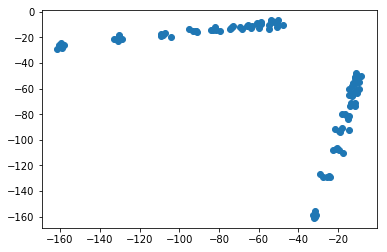

In [41]:
# Now Let's have a look at the result.
plt.scatter(x=embeded[:,0], y= embeded[:,1])
plt.show()